### Multivariate Linear Regression Task
- 구매자의 연수입(Annual Salary)과 순자산(자산 - 부채, Net Worth), 신용카드 부채(Credit Card Debt)를 통해 다변량 회귀 분석 진행

In [1]:
import pandas as pd

c_df = pd.read_csv('../datasets/car_purchasing.csv')
c_df

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,USA,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,USA,1,38,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,USA,1,54,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,USA,1,59,49811.99062,14013.034510,337826.6382,45442.15353


In [2]:
# 불필요 컬럼 제거
columns = ['Gender', 'Age','Annual Salary', 'Credit Card Debt', 'Net Worth','Car Purchase Amount']
c_df = c_df[columns]
c_df

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...
495,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,1,38,56039.49793,12301.456790,360419.0988,31491.41457
497,1,54,68888.77805,10611.606860,764531.3203,64147.28888
498,1,59,49811.99062,14013.034510,337826.6382,45442.15353


Age                 0.633273
Annual Salary       0.617862
Net Worth           0.488580
Credit Card Debt    0.028882
Gender             -0.066408
Name: Car Purchase Amount, dtype: float64

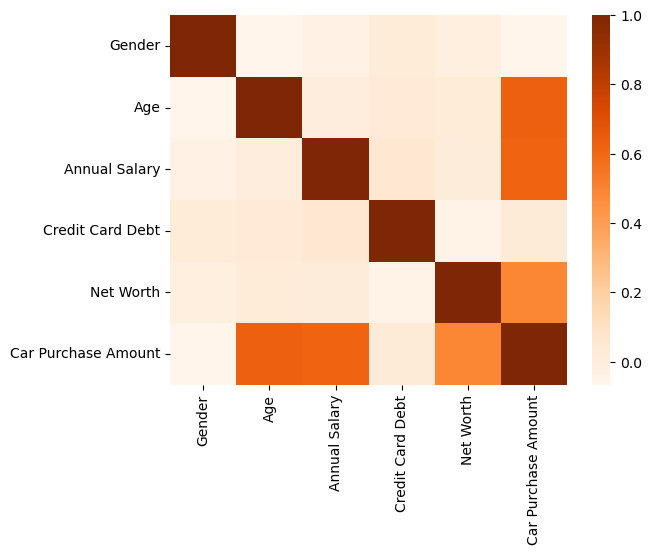

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = c_df.corr()
sns.heatmap(corr, cmap='Oranges')

c_df.corr()['Car Purchase Amount'].sort_values(ascending=False)[1:]

array([[<Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Salary'}>,
        <Axes: title={'center': 'Credit Card Debt'}>],
       [<Axes: title={'center': 'Net Worth'}>,
        <Axes: title={'center': 'Car Purchase Amount'}>]], dtype=object)

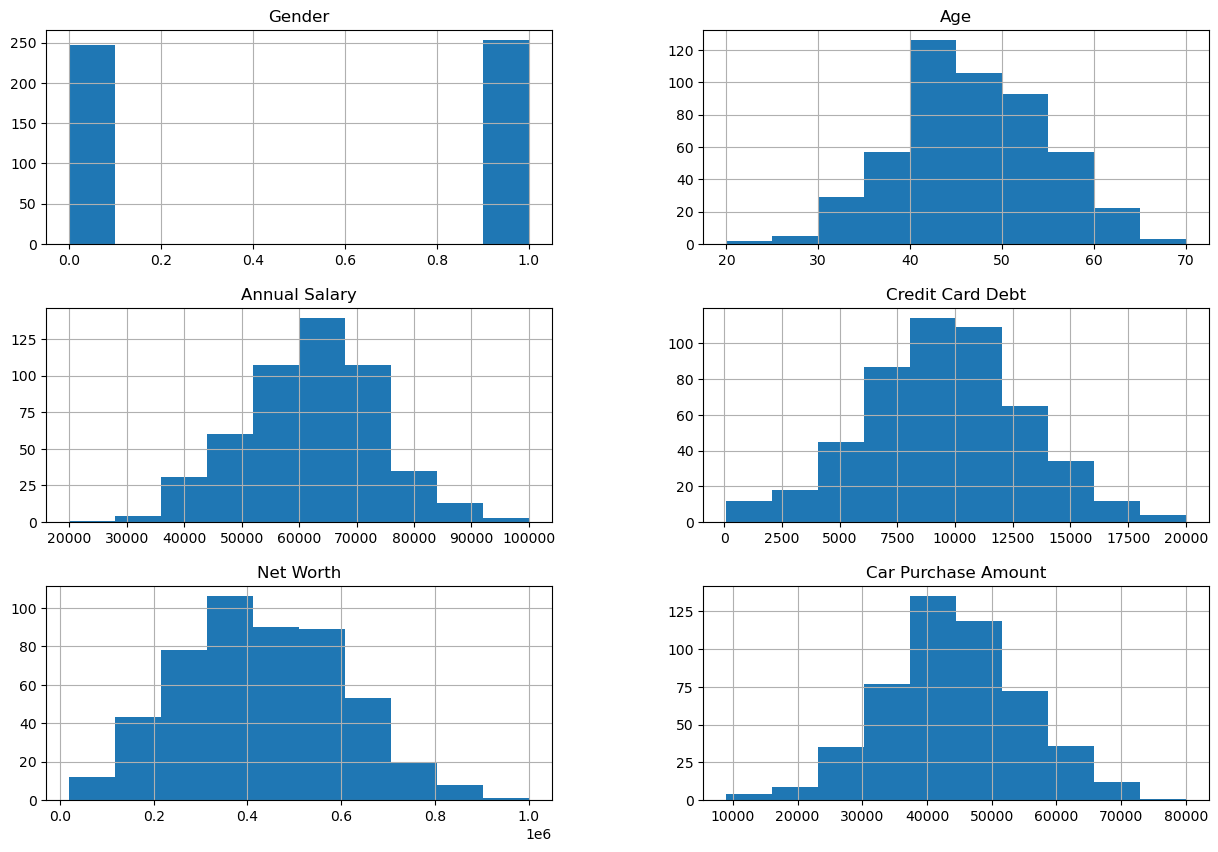

In [4]:
c_df.hist(figsize=(15,10))

In [5]:
c_df.columns

Index(['Gender', 'Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth',
       'Car Purchase Amount'],
      dtype='object')

In [6]:
# 분리 작업
from sklearn.model_selection import train_test_split
import torch
from torch.optim import SGD

torch.manual_seed(321)

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

features
targets

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=321)

X_train1 = torch.FloatTensor(X_train['Gender'].values).view(-1, 1)
X_train2 = torch.FloatTensor(X_train['Age'].values).view(-1, 1)
X_train3 = torch.FloatTensor(X_train['Annual Salary'].values).view(-1, 1)
X_train4 = torch.FloatTensor(X_train['Credit Card Debt'].values).view(-1, 1)
X_train5 = torch.FloatTensor(X_train['Net Worth'].values).view(-1, 1)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test1 = torch.FloatTensor(X_test['Gender'].values).view(-1, 1)
X_test2 = torch.FloatTensor(X_test['Age'].values).view(-1, 1)
X_test3 = torch.FloatTensor(X_test['Annual Salary'].values).view(-1, 1)
X_test4 = torch.FloatTensor(X_test['Credit Card Debt'].values).view(-1, 1)
X_test5 = torch.FloatTensor(X_test['Net Worth'].values).view(-1, 1)
y_test = torch.FloatTensor(y_test.values).view(-1,1)



W1 = torch.zeros(1, requires_grad=True)
W2 = torch.zeros(1, requires_grad=True)
W3 = torch.zeros(1, requires_grad=True)
W4 = torch.zeros(1, requires_grad=True)
W5 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = SGD([W1, W2, W3, W4, W5], lr= 7e-15)

epochs = 20000


for epoch in range(1, epochs + 1):
    
    H = W1 * X_train1 + W2 * X_train2 + W3 * X_train3 + W4 * X_train4 + W5 * X_train5 + b
    loss = torch.mean((y_train - H) ** 2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 ==0:
        print('{:4d}/{}: W1: {:.4f}, W2: {:.4f}, W3: {:.4f}, W4: {:.4f}, W5: {:.4f}, b: {:.4f}, loss: {:.4f}'\
             .format(epoch, epochs, W1.item(), W2.item(), W3.item(), W4.item(), W5.item(), b.item(), loss.item()))



 100/20000: W1: 0.0000, W2: 0.0000, W3: 0.0035, W4: 0.0005, W5: 0.0243, b: 0.0000, loss: 1228426496.0000
 200/20000: W1: 0.0000, W2: 0.0000, W3: 0.0062, W4: 0.0009, W5: 0.0421, b: 0.0000, loss: 760299200.0000
 300/20000: W1: 0.0000, W2: 0.0000, W3: 0.0083, W4: 0.0012, W5: 0.0551, b: 0.0000, loss: 508523776.0000
 400/20000: W1: 0.0000, W2: 0.0000, W3: 0.0099, W4: 0.0015, W5: 0.0646, b: 0.0000, loss: 373043008.0000
 500/20000: W1: 0.0000, W2: 0.0000, W3: 0.0112, W4: 0.0017, W5: 0.0716, b: 0.0000, loss: 300072928.0000
 600/20000: W1: 0.0000, W2: 0.0000, W3: 0.0124, W4: 0.0018, W5: 0.0767, b: 0.0000, loss: 260704256.0000
 700/20000: W1: 0.0000, W2: 0.0000, W3: 0.0133, W4: 0.0020, W5: 0.0804, b: 0.0000, loss: 239397088.0000
 800/20000: W1: 0.0000, W2: 0.0000, W3: 0.0141, W4: 0.0021, W5: 0.0831, b: 0.0000, loss: 227798720.0000
 900/20000: W1: 0.0000, W2: 0.0000, W3: 0.0148, W4: 0.0022, W5: 0.0851, b: 0.0000, loss: 221419360.0000
1000/20000: W1: 0.0000, W2: 0.0000, W3: 0.0154, W4: 0.0023, W5:

In [7]:
H = 0.0000 * X_test1 + 0.0001 * X_test2 + 0.0962 * X_test3 + 0.0130 + X_test4 + 0.0804 + X_test5  + 0
loss = torch.mean((y_test - H) **2)
print(loss.item())

184535973888.0


In [8]:
import torch 
from torch.optim import SGD

torch.manual_seed(321)

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=321)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1,1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1,1)

W=torch.zeros((5, 1), requires_grad=True)
b=torch.zeros(1, requires_grad=True)

optimizer = SGD([W, b], lr= 7e-15)

epochs = 10000

for epoch in range(1, epochs +1):
    H = X_train.matmul(W) + b
    loss = torch.mean((y_train - H)**2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('{:4d}/{}: W1: {:.4f}, W2: {:.4f}, W3: {:.4f}, b: {:.4f}, loss: {:.4f}'\
              .format(epoch, epochs, W[0].item(), W[1].item(), W[2].item(),b.item(), loss.item()))


 100/10000: W1: 0.0000, W2: 0.0000, W3: 0.0035, b: 0.0000, loss: 1228426624.0000
 200/10000: W1: 0.0000, W2: 0.0000, W3: 0.0062, b: 0.0000, loss: 760299264.0000
 300/10000: W1: 0.0000, W2: 0.0000, W3: 0.0083, b: 0.0000, loss: 508523808.0000
 400/10000: W1: 0.0000, W2: 0.0000, W3: 0.0099, b: 0.0000, loss: 373043008.0000
 500/10000: W1: 0.0000, W2: 0.0000, W3: 0.0112, b: 0.0000, loss: 300072928.0000
 600/10000: W1: 0.0000, W2: 0.0000, W3: 0.0124, b: 0.0000, loss: 260704256.0000
 700/10000: W1: 0.0000, W2: 0.0000, W3: 0.0133, b: 0.0000, loss: 239397088.0000
 800/10000: W1: 0.0000, W2: 0.0000, W3: 0.0141, b: 0.0000, loss: 227798720.0000
 900/10000: W1: 0.0000, W2: 0.0000, W3: 0.0148, b: 0.0000, loss: 221419360.0000
1000/10000: W1: 0.0000, W2: 0.0000, W3: 0.0154, b: 0.0000, loss: 217845632.0000
1100/10000: W1: 0.0000, W2: 0.0000, W3: 0.0160, b: 0.0000, loss: 215780144.0000
1200/10000: W1: 0.0000, W2: 0.0000, W3: 0.0166, b: 0.0000, loss: 214525680.0000
1300/10000: W1: 0.0000, W2: 0.0000, W3:

### Linear 사용

In [9]:
import torch
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD
from sklearn.model_selection import train_test_split

torch.manual_seed(321)

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=321)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

l_r = Linear(5,1)

optimizer = SGD(l_r.parameters(), lr= 7e-15)

epochs =10000

for epoch in range(1, epochs):
    H = l_r(X_train) + b
    loss = mse_loss(y_train, H)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('{:4d}/{}: '\
              .format(epoch, epochs), end='')
        for i, w in enumerate(list(l_r.parameters())[0][0]):
            print('W{}: {:.4f}, '.format(i + 1, w.item()), end='')
        print('b: {:.4f}, loss: {:.4f}'.format(list(l_r.parameters())[1].item(), loss.item()))

 100/10000: W1: 0.2707, W2: -0.2442, W3: 0.3919, W4: -0.3411, W5: 0.2039, b: -0.0291, loss: 5229954560.0000
 200/10000: W1: 0.2707, W2: -0.2442, W3: 0.3871, W4: -0.3418, W5: 0.1636, b: -0.0291, loss: 2844260352.0000
 300/10000: W1: 0.2707, W2: -0.2442, W3: 0.3836, W4: -0.3424, W5: 0.1340, b: -0.0291, loss: 1561873792.0000
 400/10000: W1: 0.2707, W2: -0.2442, W3: 0.3810, W4: -0.3427, W5: 0.1123, b: -0.0291, loss: 872541248.0000
 500/10000: W1: 0.2707, W2: -0.2442, W3: 0.3793, W4: -0.3430, W5: 0.0964, b: -0.0291, loss: 501989120.0000
 600/10000: W1: 0.2707, W2: -0.2442, W3: 0.3780, W4: -0.3432, W5: 0.0848, b: -0.0291, loss: 302787840.0000
 700/10000: W1: 0.2707, W2: -0.2442, W3: 0.3771, W4: -0.3433, W5: 0.0762, b: -0.0291, loss: 195691232.0000
 800/10000: W1: 0.2707, W2: -0.2442, W3: 0.3765, W4: -0.3434, W5: 0.0699, b: -0.0291, loss: 138103024.0000
 900/10000: W1: 0.2707, W2: -0.2442, W3: 0.3761, W4: -0.3435, W5: 0.0653, b: -0.0291, loss: 107126448.0000
1000/10000: W1: 0.2707, W2: -0.244

In [10]:
list(l_r.parameters())

[Parameter containing:
 tensor([[ 0.2707, -0.2442,  0.3900, -0.3410,  0.0507]], requires_grad=True),
 Parameter containing:
 tensor([-0.0291], requires_grad=True)]

In [33]:
import numpy as np

# 현쟈 w 는 가장 마지막 값을 가지고 있으며 만약 마지막 w가 최적의 파라미터가 아니라면 
# 리스트로 다시 w 를 재정의 해서 전달해줄것 

H = sum(w * X_test[:, i].view(-1, 1) for w, i in zip(W, range(5)))
loss = torch.mean((y_test - H) ** 2)
print(loss.item())
print(np.sqrt(loss.item()))

177490496.0
13322.555910935409


In [22]:
from torch.nn import Module, Linear

class LinearRegressionModel(Module):
    def __init__(self):
        super().__init__()
        self.linear= Linear(5 ,1)

    def forward(self, x):
        return self.linear(x)

In [ ]:
import torch
from torch.nn import Linear
from torch.nn.functional import mse_loss
from torch.optim import SGD
from sklearn.model_selection import train_test_split

torch.manual_seed(321)

X_train, X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=321)

X_train = torch.FloatTensor(X_train.values)
y_train = torch.FloatTensor(y_train.values).view(-1, 1)

X_test = torch.FloatTensor(X_test.values)
y_test = torch.FloatTensor(y_test.values).view(-1, 1)

l_r = LinearRegressionModel()

optimizer = SGD(l_r.parameters(), lr= 1e-15)

epochs =5000000

for epoch in range(1, epochs):
    H = l_r(X_train) + b
    loss = mse_loss(y_train, H)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('{:4d}/{}: '\
              .format(epoch, epochs), end='')
        for i, w in enumerate(list(l_r.parameters())[0][0]):
            print('W{}: {:.4f}, '.format(i + 1, w.item()), end='')
        print('b: {:.4f}, loss: {:.4f}'.format(list(l_r.parameters())[1].item(), loss.item()))

 100/5000000: W1: 0.2707, W2: -0.2442, W3: 0.3974, W4: -0.3402, W5: 0.2499, b: -0.0291, loss: 8808223744.0000
 200/5000000: W1: 0.2707, W2: -0.2442, W3: 0.3964, W4: -0.3404, W5: 0.2414, b: -0.0291, loss: 8067725824.0000
 300/5000000: W1: 0.2707, W2: -0.2442, W3: 0.3954, W4: -0.3405, W5: 0.2332, b: -0.0291, loss: 7389986816.0000
 400/5000000: W1: 0.2707, W2: -0.2442, W3: 0.3945, W4: -0.3407, W5: 0.2254, b: -0.0291, loss: 6769693184.0000
 500/5000000: W1: 0.2707, W2: -0.2442, W3: 0.3936, W4: -0.3408, W5: 0.2179, b: -0.0291, loss: 6201973248.0000
 600/5000000: W1: 0.2707, W2: -0.2442, W3: 0.3927, W4: -0.3410, W5: 0.2108, b: -0.0291, loss: 5682369024.0000
 700/5000000: W1: 0.2707, W2: -0.2442, W3: 0.3919, W4: -0.3411, W5: 0.2039, b: -0.0291, loss: 5206810112.0000
 800/5000000: W1: 0.2707, W2: -0.2442, W3: 0.3911, W4: -0.3412, W5: 0.1974, b: -0.0291, loss: 4771556352.0000
 900/5000000: W1: 0.2707, W2: -0.2442, W3: 0.3903, W4: -0.3413, W5: 0.1911, b: -0.0291, loss: 4373191168.0000
1000/50000

In [ ]:
import numpy as np

# 현쟈 w 는 가장 마지막 값을 가지고 있으며 만약 마지막 w가 최적의 파라미터가 아니라면 
# 리스트로 다시 w 를 재정의 해서 전달해줄것 

H = sum(w * X_test[:, i].view(-1, 1) for w, i in zip(W, range(5)))
loss = torch.mean((y_test - H) ** 2)
print(loss.item())
print(np.sqrt(loss.item()))

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features, targets = c_df.iloc[:, :-1], c_df.iloc[:, -1]
X_train,X_test, y_train, y_test = \
train_test_split(features, targets, test_size=0.2, random_state=321)

l_r = LinearRegression()
l_r.fit(X_train, y_train)

LinearRegression()

In [43]:
print(l_r.coef_)
print(l_r.intercept_)

[3.73552670e+01 8.39038080e+02 5.61883520e-01 6.00676891e-03
 2.89545490e-02]
-42052.905171453785


In [40]:
import numpy as np

prediction = l_r.predict(X_test)
print('MSE loss: {:.4f}, RMSE loss: {:.4f}'.format(mean_squared_error(y_test, prediction),
                                                   np.sqrt(mean_squared_error(y_test,prediction))))

MSE loss: 56028.1218, RMSE loss: 236.7026
